In [62]:
import pandas as pd
yellow_2018_06=pd.read_csv('yellow_tripdata_2018-06.csv',encoding='latin1')

In [63]:
taxi_zones=pd.read_csv('taxi _zone_lookup.csv',encoding='latin1')

In [64]:
# Merge the data set with the reference data for taxi zones
yellow_2018_06_with_tz = yellow_2018_06.merge(taxi_zones,left_on='PULocationID', right_on='LocationID')

In [65]:
#RQ3
from datetime import datetime

In [66]:
# columns tpep_pickup_datetime and tpep_dropoff_datetime are in string format
# to caclulate duration of the ride we need to convert them to date format which can be done using strptime function from datetime
yellow_2018_06_with_tz['tpep_dropoff_datetime'] = yellow_2018_06_with_tz['tpep_dropoff_datetime'].map(lambda tpep_dropoff_datetime: datetime.strptime(tpep_dropoff_datetime, "%Y-%m-%d %H:%M:%S"))

In [67]:
yellow_2018_06_with_tz['tpep_pickup_datetime'] = yellow_2018_06_with_tz['tpep_pickup_datetime'].map(lambda tpep_pickup_datetime: datetime.strptime(tpep_pickup_datetime, "%Y-%m-%d %H:%M:%S"))

In [68]:
# timedelta is needed to express difference between 2 timestamps in minutes
from datetime import timedelta
# math library is needed for ceil function
import math
# adding new column trip_duration into the data set
yellow_2018_06_with_tz['trip_duration']=(yellow_2018_06_with_tz['tpep_dropoff_datetime']-yellow_2018_06_with_tz['tpep_pickup_datetime'])/timedelta(minutes=1)
# to plot trip duration in more readable form values will be rounded upwards (ceiled)
yellow_2018_06_with_tz['trip_duration']=yellow_2018_06_with_tz['trip_duration'].map(lambda trip_duration: math.ceil(trip_duration))


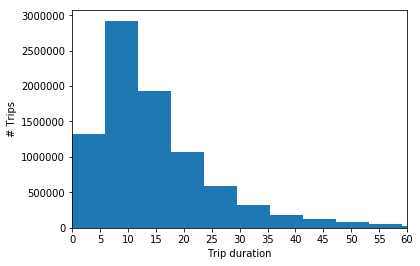

In [69]:
import matplotlib.pyplot as plt
import numpy as np
plt.xlim([0,60])
yellow_2018_06_with_tz['trip_duration'].plot(kind='hist',bins=1500)
c=0
x=[]
while c<=60:
    x.append(c)
    c+=5
plt.xticks(x) 
plt.xlabel("Trip duration")
plt.ylabel("# Trips")
plt.show()

Borough
Bronx            [AxesSubplot(0.125,0.125;0.775x0.755)]
Brooklyn         [AxesSubplot(0.125,0.125;0.775x0.755)]
EWR              [AxesSubplot(0.125,0.125;0.775x0.755)]
Manhattan        [AxesSubplot(0.125,0.125;0.775x0.755)]
Queens           [AxesSubplot(0.125,0.125;0.775x0.755)]
Staten Island    [AxesSubplot(0.125,0.125;0.775x0.755)]
Unknown          [AxesSubplot(0.125,0.125;0.775x0.755)]
Name: trip_duration, dtype: object

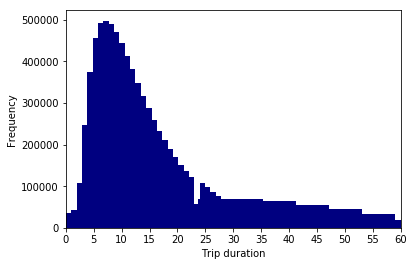

In [74]:
# I am trying to display data for each borrow in one histagram but it doesn't work
# This seems like a good website with useful examples
# https://janakiev.com/blog/pandas-groupby/

group = yellow_2018_06_with_tz['trip_duration'].groupby(yellow_2018_06_with_tz['Borough'])
plt.xlim([0,60])
c=0
x=[]
while c<=60:
    x.append(c)
    c+=5
plt.xticks(x) 
plt.xlabel("Trip duration")
plt.ylabel("# Trips")
group.plot(kind='hist',bins=1500, rot=0,lw=2,colormap='jet',figsize=(10,4), subplots=True)